In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# matrice numpy
df.shape

(569, 30)

In [6]:
X = df.values

In [7]:
# pentru PCA important de scalat datele
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

In [8]:
# training in the data
from sklearn.decomposition import PCA

pca_30 = PCA(n_components= 30, random_state= 42)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [9]:
print('Varianta explicata de principalele componente = ', sum(pca_30.explained_variance_ratio_*100))

Varianta explicata de principalele componente =  100.0


In [10]:
pca_30.explained_variance_ratio_*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

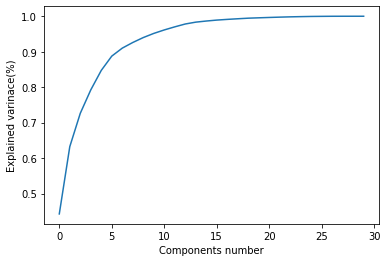

In [13]:
# ne prezinta la cat putem reduce numarul de componente
plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Components number')
plt.ylabel('Explained varinace(%)')
plt.show()

In [14]:
pca_2 = PCA(n_components=2, random_state= 42)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

In [15]:
# 2 componente explica 62 % din date
print('Varianta explicata de principalele componente = ', sum(pca_2.explained_variance_ratio_*100))

Varianta explicata de principalele componente =  63.24320765155939


Text(0, 0.5, 'Second component')

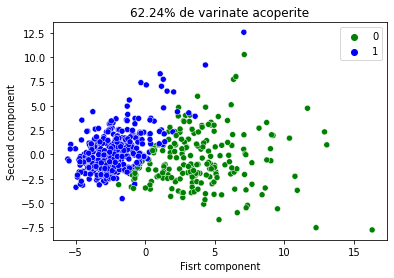

In [16]:
sns.scatterplot(x = X_pca_2[:,0], y = X_pca_2[:, 1], hue = cancer.target, palette=['green', 'blue'])
plt.title("62.24% de varinate acoperite")
plt.xlabel('Fisrt component')
plt.ylabel('Second component')

In [17]:
# 3 componente
pca_3 = PCA(n_components = 3, random_state = 42)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

In [18]:
# 2 componente explica 62 % din date
print('Varianta explicata de principalele componente = ', sum(pca_3.explained_variance_ratio_*100))

Varianta explicata de principalele componente =  72.63637090898553


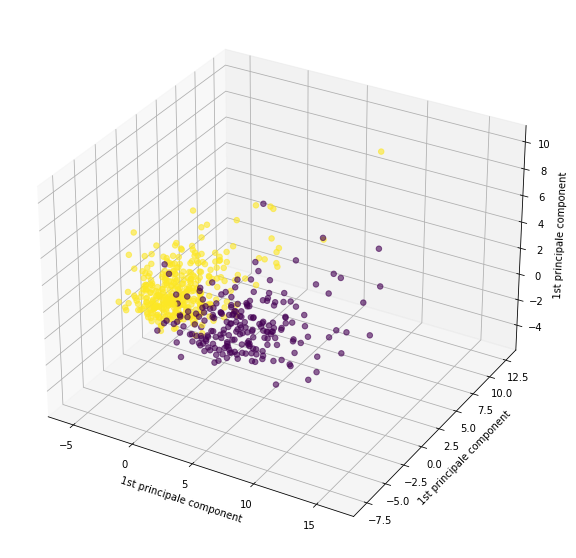

In [23]:
# import the lobary
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10)) # Set figure size
ax = plt.axes(projection = '3d')

scct = ax.scatter3D(X_pca_3[:,0], X_pca_3[:, 1], X_pca_3[:, 2], c = cancer.target, s = 30, alpha = 0.60)

ax.set_xlabel('1st principale component')
ax.set_ylabel('1st principale component')
ax.set_zlabel('1st principale component')

plt.show()

In [24]:
# 3 componente
pca_95 = PCA(n_components = 0.95, random_state = 42)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

In [25]:
X_pca_95.shape

(569, 10)